#Trabajo Integrador Curso Data Scient.
Alumno : Sebastian Sarries.
Data Set elegido : "TSLA.csv".

##Contexto
En el mundo de las finanzas, la predicción precisa del precio de las acciones es un desafío codiciado por inversores y analistas. Con el auge de la tecnología y el aprendizaje automático (ML), ahora es posible aprovechar el poder de los algoritmos para analizar grandes conjuntos de datos y generar predicciones informadas sobre el comportamiento del mercado.

TSLA en Ascenso:

Tesla, Inc. (TSLA) ha sido una de las empresas más comentadas en los últimos meses, experimentando un aumento vertiginoso en el precio de sus acciones. Con un incremento del 100% en solo 30 días, este fenómeno ha despertado la curiosidad de muchos, ansiosos por comprender las fuerzas detrás de este repunte.

Tu Misión:

Como estudiantes de aprendizaje automático, se les presenta la oportunidad de explorar los factores que influyen en el precio de las acciones de Tesla utilizando un conjunto de datos histórico.

Evaluacion de Modelos : se evaluaran 2 modelos de prediccion :
    - Regresion Lineal 
    - Soporte de Maquinas Vectoriales (SMV)

Producto final: Se desarrollara una aplicacion que solicitara la cantidad de dias a futuro que se desea predecir. La aplicacion devolvera la prediccion y tambien la presicion estadistica  y el error medio cuadratico de la prediccion.



## Importacion de Librerias


In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import yfinance as yf  # Instala con pip install yfinance
import seaborn as sns
from datetime import datetime , timedelta
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error

## Conexion con google drive para apertura de data *set* en formato scv

In [31]:
#from google.colab import drive
#drive.mount('content/drive')
data=pd.read_csv('/home/ssarries/Documentos/CURSO DATA SCIENT/trabajo integrador/TSLA.csv')

#EDA = Exploratory Data Analysis
Comenzamos la exploracion de los datos


In [32]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


##Objetivo : explorar los factores que influyen en el precio de las acciones de Tesla utilizando un conjunto de datos histórico.




In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.3+ KB


##Descripcion de los datos a evaluar:
Segun la informacion brindada por los comandos head() y info() podemos inferir que contamos con un set de datos de 2416 registros y 7 columnas/campos cada uno.


##Descripcion de las columnas/campos del data set :


0)  Date -
  Descripcion: Fecha de la jornada bursatil.
  Tipo de dato  : Object (texto - se evaluara a futuro si es necesaria una conversion del tipo de dato).
  Cantidad de registros  :  2416.
  Valores nulos :  sin valores nulos.

1)  Open -
  Descripcion : Precio de la accion en la apertura de las operaciones bursatiles.
  Tipo de dato : Float64 (numero flotante)   
  Cantidad de registros : 2416.  
  Valores nulos : sin valores nulos.

2) High -
  Descripcion : Precio maximo de la accion durante la jornada bursatil.
  Tipo de dato :Float64 (numero flotante)
  Cantidad de registros : 2416.
  Valores nulos : sin valores nulos.

3) Low -
  Descripcion : Valor mas bajo de la accion durante la jornada bursatil.
  Tipo de dato :Float64 (numero flotante)
  Cantidad de registros : 2416.
  Valores nulos : sin valores nulos.

4) Close -
  Descripcion : Valor  de la accion al cierre de la jornada bursatil.
  Tipo de dato :Float64 (numero flotante)
  Cantidad de registros : 2416.
  Valores nulos : sin valores nulos.

5) Adj Close -
  Descripcion : Valor  de la accion al cierre de la jornada bursatil ( a evaluar si no es un dato repetido) .
  Tipo de dato :Float64 (numero flotante)
  Cantidad de registros : 2416.
  Valores nulos : sin valores nulos.

6) Volume -
  Descripcion : Cantidad de operaciones en la jornada bursatil.
  Tipo de dato :int64 (numero entero)
  Cantidad de registros : 2416.
  Valores nulos : sin valores nulos.


## Analisis Estadistico

In [34]:
data.describe()


,Open,High,Low,Close,Adj Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06
50%,213.035004,216.745002,208.870002,212.960007,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07





GRAFICO DE SESGO
https://drive.google.com/file/d/1k3TzaZcMkJGru5_0meokEwdvSGSlytQc/view?usp=drive_link

##Analisis de Medidas Estadisticas

##Simetria
Podemos ver que para todas las columnas/campos que tienen que ver con el precio de las acciones (Open, High, Low, Close y Adj Close) tenemos un sesgo negativo es decir asimetria hacia la izquierda.
Es decir la MEDIA(mean) es menor que MEDIANA(50%).
Para el caso de volumen de operaciones observamos que la media (mean) es mayor que la mediana (50%) por lo que en esta variable tenemos un sesgo positivo es decir que la curva esta mas achatada hacia la derecha.



# Preparacion de los datos 
## Comenzamos la Preparacion de los datos
El campo 'Date' figura como object, para un mejor manejo y comprension lo pasaremos a tipo fecha.


In [35]:
data['Date'] = pd.to_datetime(data['Date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2416 non-null   datetime64[ns]
 1   Open       2416 non-null   float64       
 2   High       2416 non-null   float64       
 3   Low        2416 non-null   float64       
 4   Close      2416 non-null   float64       
 5   Adj Close  2416 non-null   float64       
 6   Volume     2416 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 132.3 KB


# Conversion de campo 'Date' a datetime64
Podemos observar que se convirtio correctamente el formato del campo a traves del comando .info()


In [36]:
data.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


#Chequearemos que no exitan datos duplicados



In [37]:
duplicados = data.duplicated()

# Verifica si hay filas duplicadas en una columna específica, por ejemplo, 'Date'
duplicados_fecha = data.duplicated(subset=['Date'])

# Imprime los resultados
print("¿Hay filas duplicadas en todo el DataFrame?:", duplicados.any())
print("¿Hay filas duplicadas en la columna 'Date'?:", duplicados_fecha.any())

# Si deseas ver las filas duplicadas
filas_duplicadas = data[duplicados]
print("Filas duplicadas:")
print(filas_duplicadas)

¿Hay filas duplicadas en todo el DataFrame?: False
¿Hay filas duplicadas en la columna 'Date'?: False
Filas duplicadas:
Empty DataFrame
Columns: [Date, Open, High, Low, Close, Adj Close, Volume]
Index: []


Luego de esta revicion podemos garantizar que no hay datos duplicados evaluandolos con base en el campo fecha ('Date')


Evaluamos que no hayan valores nulos en las columnas

In [38]:
#Metodo isna()

num_missing = data.isna().sum()
print(num_missing)
# Filtrar las columnas con valores faltantes
columns_with_missing = num_missing[num_missing > 0]

# Filtrar las columnas sin valores faltantes (aquellas con 0 valores faltantes)
columns_with_no_missing = num_missing[num_missing == 0]

print("Columnas con valores faltantes:")
print(columns_with_missing)


Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
Columnas con valores faltantes:
Series([], dtype: int64)


No encontramos columnas con valores nulos.

Por lo evaluado en el data.describe() data.head() y data.tail() , observamos que la columna Close y la columna Adj Close tienen los mismos datos. Por lo que se determina la eliminacion de la columna Adj Close.
Esto se realiza con el comando data.drop 


In [39]:
data = data.drop('Adj Close', axis=1)

data.head()



,Date,Open,High,Low,Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900


# Evaluacion de los datos
Haremos un grafico que nos de la evolucion de los precios de apertura (Open) por fecha (Date)

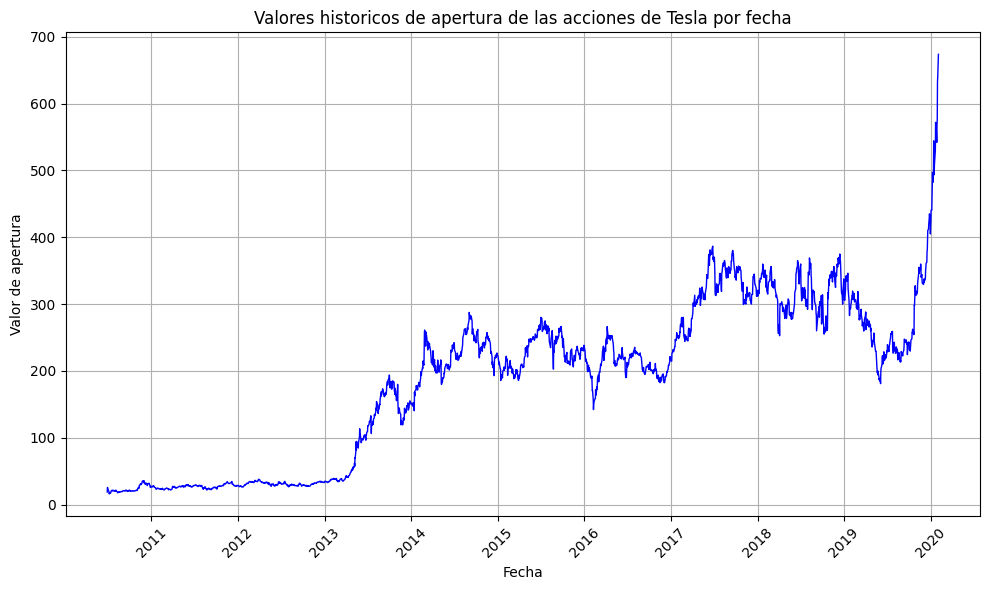

In [40]:
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Open'], color='blue', linewidth=1)
plt.title('Valores historicos de apertura de las acciones de Tesla por fecha')
plt.xlabel('Fecha')
plt.ylabel('Valor de apertura')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.grid(True)
plt.tight_layout()
plt.show()

Observaciones : podemos ver como el precio de apertura (Open) de  las acciones tienen un crecimiento exponencial a partir de mediados del año 2019


Haremos una comparativa de los valores de las acciones respecto del precio de apertura (Open)

<Figure size 1200x1000 with 0 Axes>

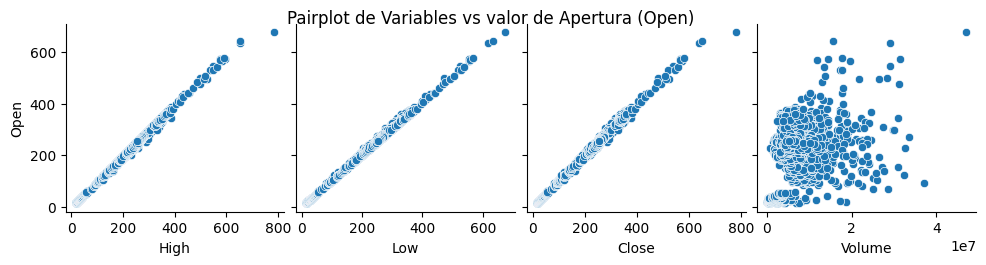

In [41]:
plt.figure(figsize=(12, 10))
sns.pairplot(data, x_vars=['High', 'Low', 'Close', 'Volume'], y_vars=['Open'], kind='scatter', diag_kind='hist')
plt.suptitle('Pairplot de Variables vs valor de Apertura (Open) ', y=1.02)
plt.show()

Tomando esta comparativa podemos inferir que hay una correlacion casi lineal entre el precio de apertura (Open) y los precios de maxima (High) , minima (Low) y cierre (Close).

Respecto del volumen operado no podemos hacer una inferencia clara.

Evaluacion de valores de apertura (Open) para determinar valores atipicos a traves de un grafico de tipo boxplot.




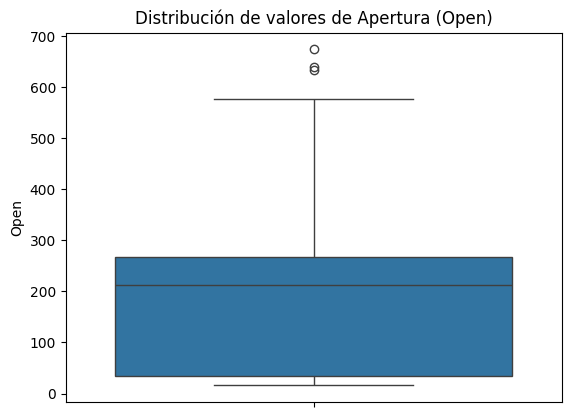

In [42]:
sns.boxplot(data['Open'])
plt.title('Distribución de valores de Apertura (Open)')
plt.show()

Segun el grafico de boxplot podemos decir que los valores inferiores a 20 aproximadamente y los valores que los valores superiores a aproximadamente 590 de apertura (Open) los califica como valores atipicos. Segun el grafico hay varios valores superiores a 590. Tenemos una media de 213.
Teniendo en cuenta el grafico de histograma realizado al principio y evaluando la naturaleza imprevisible de los precios de las acciones, no tomaremos ninguna accion respecto de estos datos calificados como atipicos por el grafico de boxplot.
Los valores atipicos se encontrarian a la derecha es decir valores muy altos (mayores de 590) en este caso. Esto nos deja en claro que el ultimo año evaluado desde finales de 2019  y año 2020 los precios de las acciones actuaron de forma atipica subiendo exponencialmente.


Evaluaremos la volatilidad de las acciones determinando la diferencia entre el precio maximo (High) y el precio minimo (Low)

In [43]:



# Calcula la volatilidad diaria restando el valor High del valor Low
data['Volatilidad'] = data['High'] - data['Low']

# Otra forma de calcular la volatilidad es utilizando la función pct_change()
# Esta calcula el cambio porcentual entre el valor High y el valor Low
# df['Volatilidad'] = df['Low'].pct_change() * 100  # Calcula la volatilidad en porcentaje

# Luego puedes calcular la volatilidad promedio
volatilidad_promedio = data['Volatilidad'].mean()

# Imprime la volatilidad promedio
print("Volatilidad promedio:", volatilidad_promedio)

data.head()

Volatilidad promedio: 6.661585173841059


,Date,Open,High,Low,Close,Volume,Volatilidad
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,7.459999
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,7.120001
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,5.650000
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,4.390001
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,4.170000


Evaluaremos la diferencia entre 'Close' menos 'Open' y la nombraremos como 'Resultado' de modo de evaluar el resultado diario de la accion

In [44]:
# Calcula el resultado  diario restando el valor Close del valor Open
data['Resultado'] = data['Close'] - data['Open']
data.head()

,Date,Open,High,Low,Close,Volume,Volatilidad,Resultado
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,7.459999,4.889999
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,7.120001,-1.960001
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,5.650000,-3.040001
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,4.390001,-3.799999
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,4.170000,-3.889999


Hacemos una evaluacion de las distintas variables entre si para determinar si hay correlaciones entre las mismas.

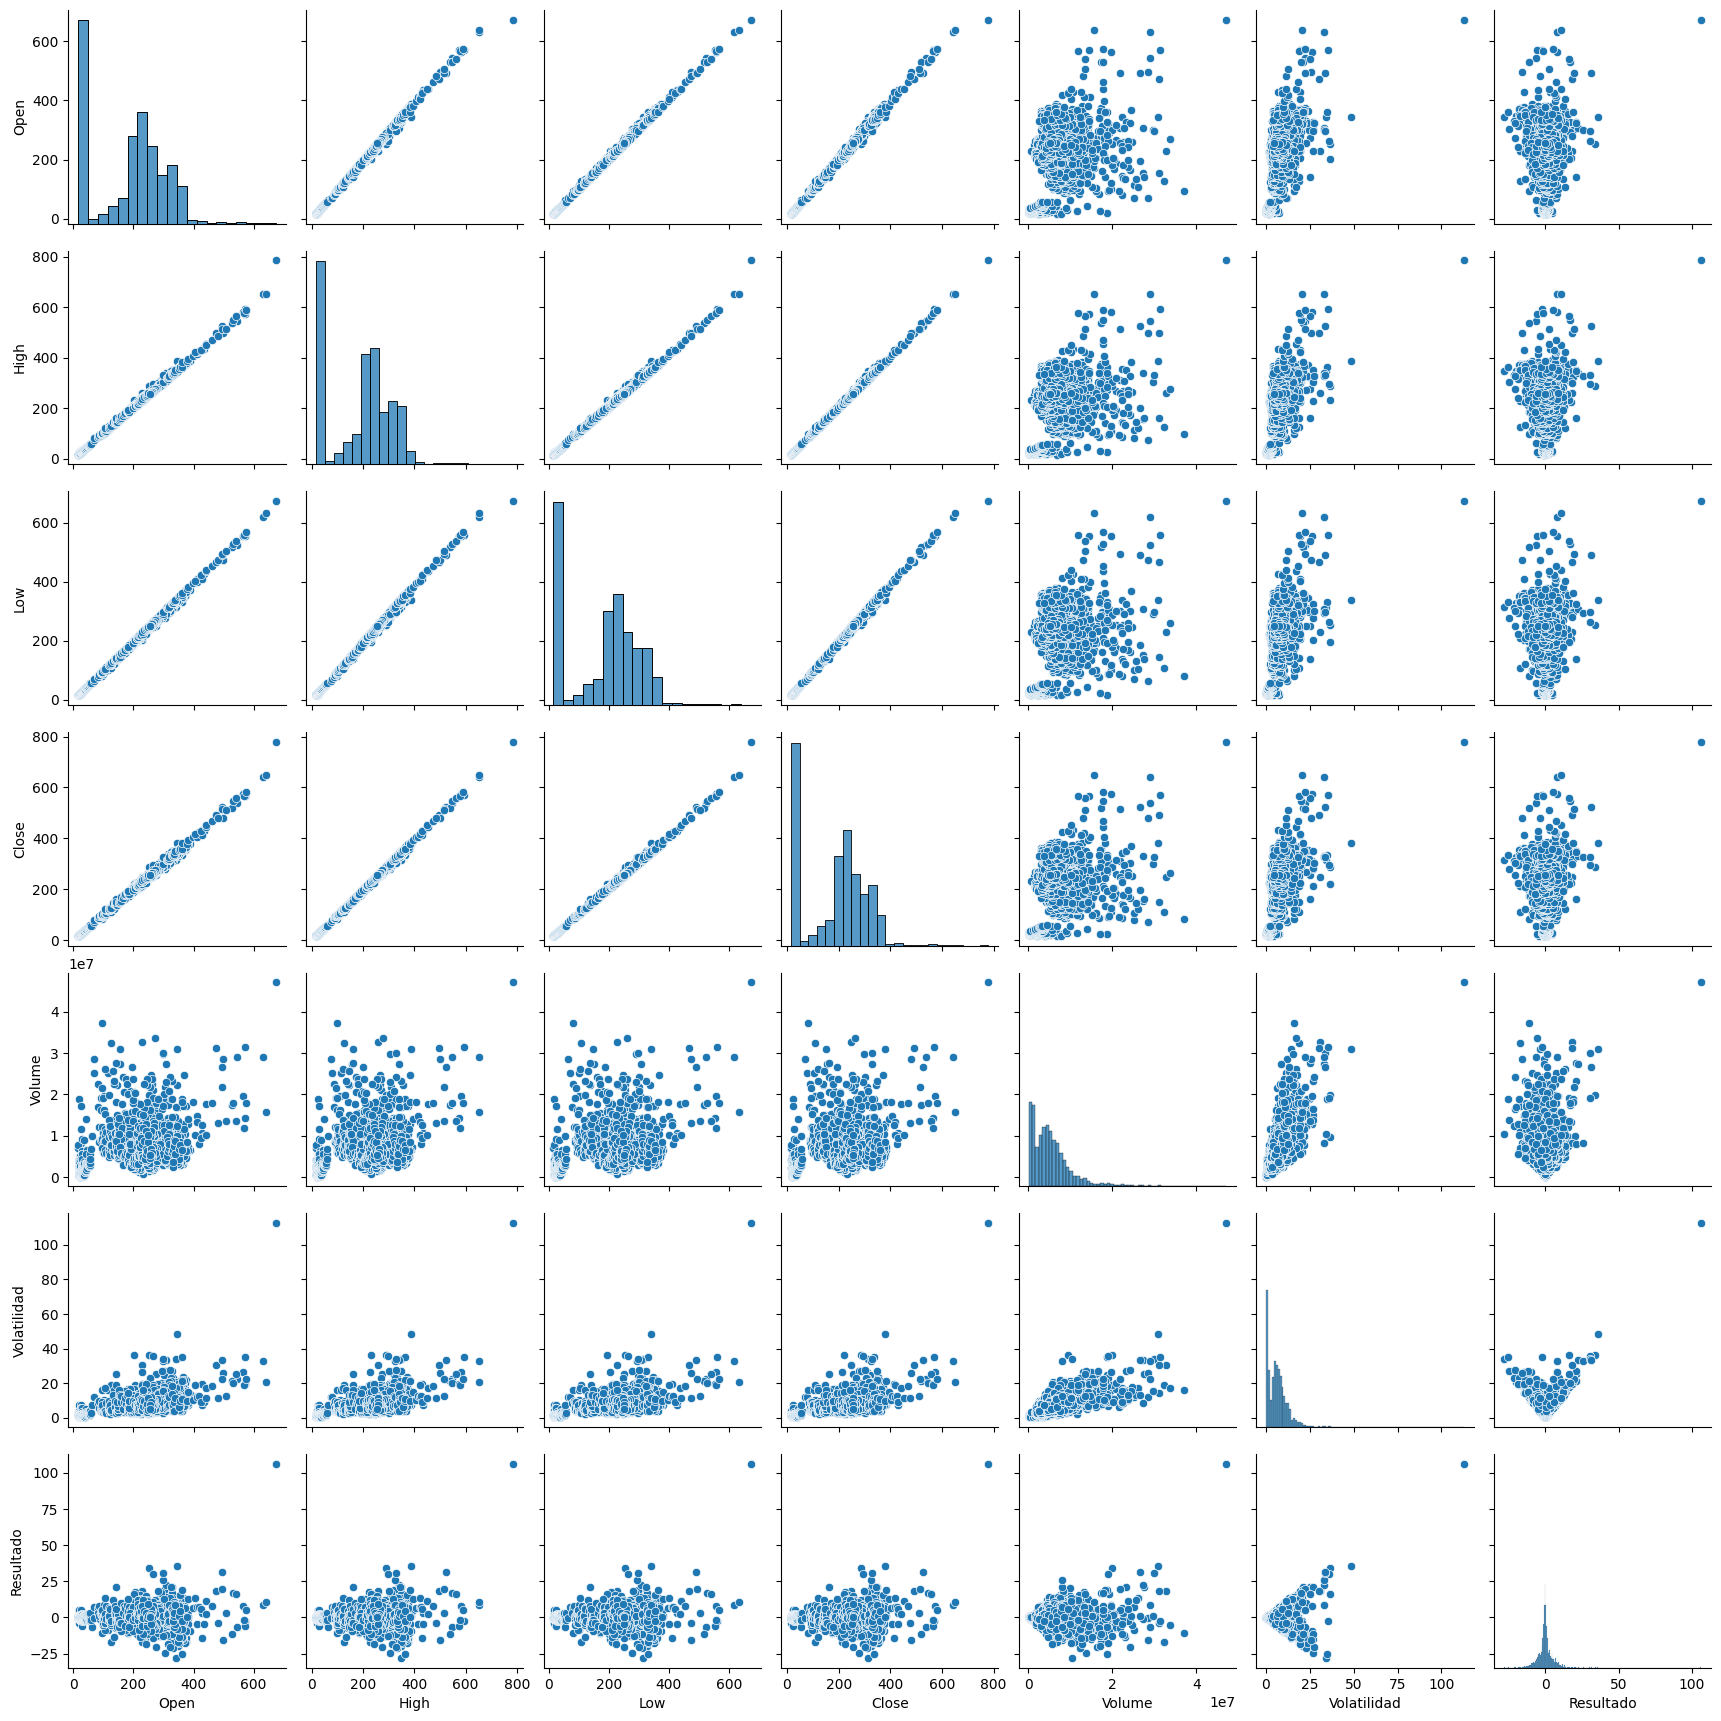

In [45]:
sns.pairplot(data)

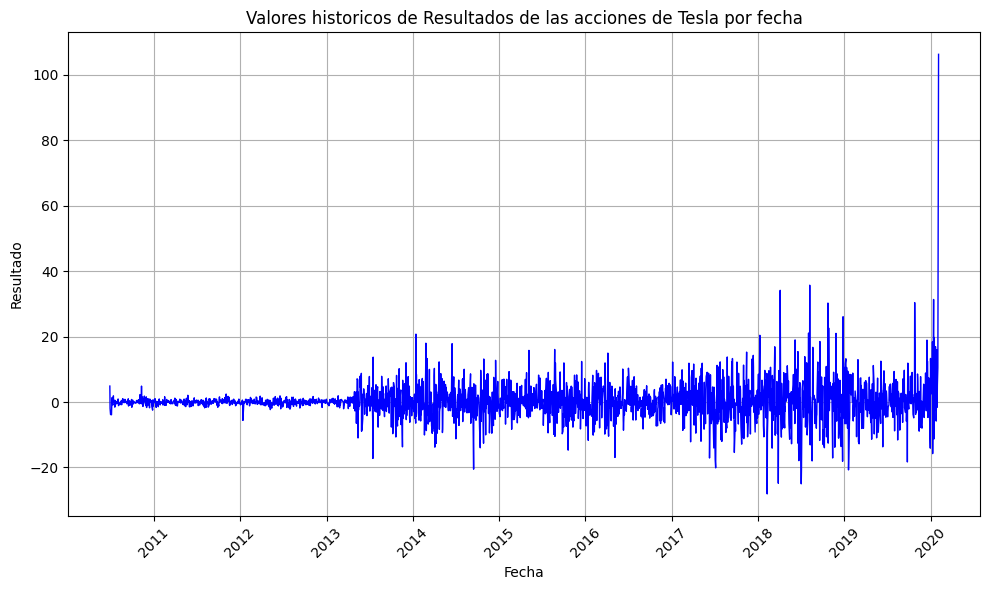

In [47]:
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Resultado'], color='blue', linewidth=1)
plt.title('Valores historicos de Resultados de las acciones de Tesla por fecha')
plt.xlabel('Fecha')
plt.ylabel('Resultado')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.grid(True)
plt.tight_layout()
plt.show()

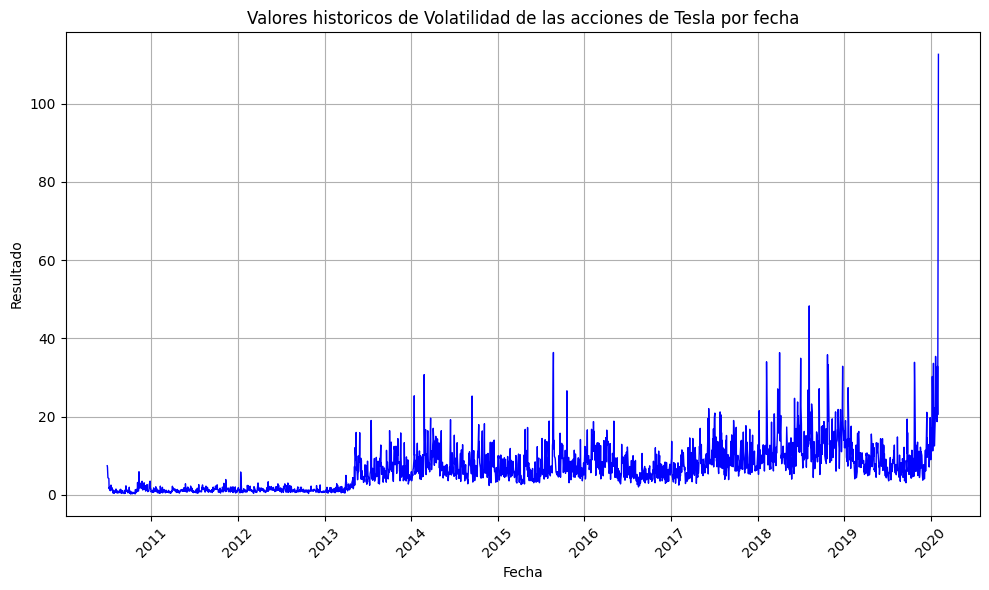

In [48]:
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Volatilidad'], color='blue', linewidth=1)
plt.title('Valores historicos de Volatilidad de las acciones de Tesla por fecha')
plt.xlabel('Fecha')
plt.ylabel('Resultado')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.grid(True)
plt.tight_layout()
plt.show()

In [49]:
data.tail(50)

,Date,Open,High,Low,Close,Volume,Volatilidad,Resultado
2366,2019-11-20,360.000000,361.200012,349.570007,352.220001,6725100,11.630005,-7.779999
2367,2019-11-21,354.510010,360.839996,354.000000,354.829987,6110000,6.839996,0.319977
2368,2019-11-22,340.160004,341.000000,330.000000,333.040009,16870600,11.000000,-7.119995
2369,2019-11-25,344.320007,344.570007,334.459991,336.339996,12339500,10.110016,-7.980011
2370,2019-11-26,335.269989,335.500000,327.100006,328.920013,7947400,8.399994,-6.349976
2371,2019-11-27,331.119995,333.929993,328.570007,331.290009,5555600,5.359986,0.170014
2372,2019-11-29,331.109985,331.260010,327.500000,329.940002,2465600,3.760010,-1.169983
2373,2019-12-02,329.399994,336.380005,328.690002,334.869995,6074500,7.690003,5.470001
2374,2019-12-03,332.619995,337.910004,332.190002,336.200012,6573700,5.720002,3.580017
2375,2019-12-04,337.750000,337.859985,332.850006,333.029999,5533000,5.009979,-4.720001


# Posible Valor Atipico

Se observa un posible valor atipico  en el ultimo registro con fecha 2020-02-03, evaluando los valores de resultados y volatilidad. Se hara un analisis para determinar que opciones tomar con este dato no afecte a nuestro modelo. Como primera medida se dejaran estos valores atipicos. Luego en caso de que el modelo presente fallas por sesgo, se evaluara su modificacion o eliminacion.


# Evaluaremos la correlacion entre las variables 

Pearson

La correlación de Pearson evalúa la relación lineal entre dos variables continuas. Su coeficiente varía entre -1 y 1, donde:

1 indica una correlación positiva perfecta (las variables aumentan juntas). -1 indica una correlación negativa perfecta (una variable aumenta mientras la otra disminuye). 0 indica que no hay correlación lineal.

Correlación de Pearson:

Requiere que ambas variables sean cuantitativas y tengan una distribución normal. La relación entre las variables debe ser lineal.


In [50]:
# Calcula la correlación de Pearson
correlacion_pearson = data.corr(method='pearson')

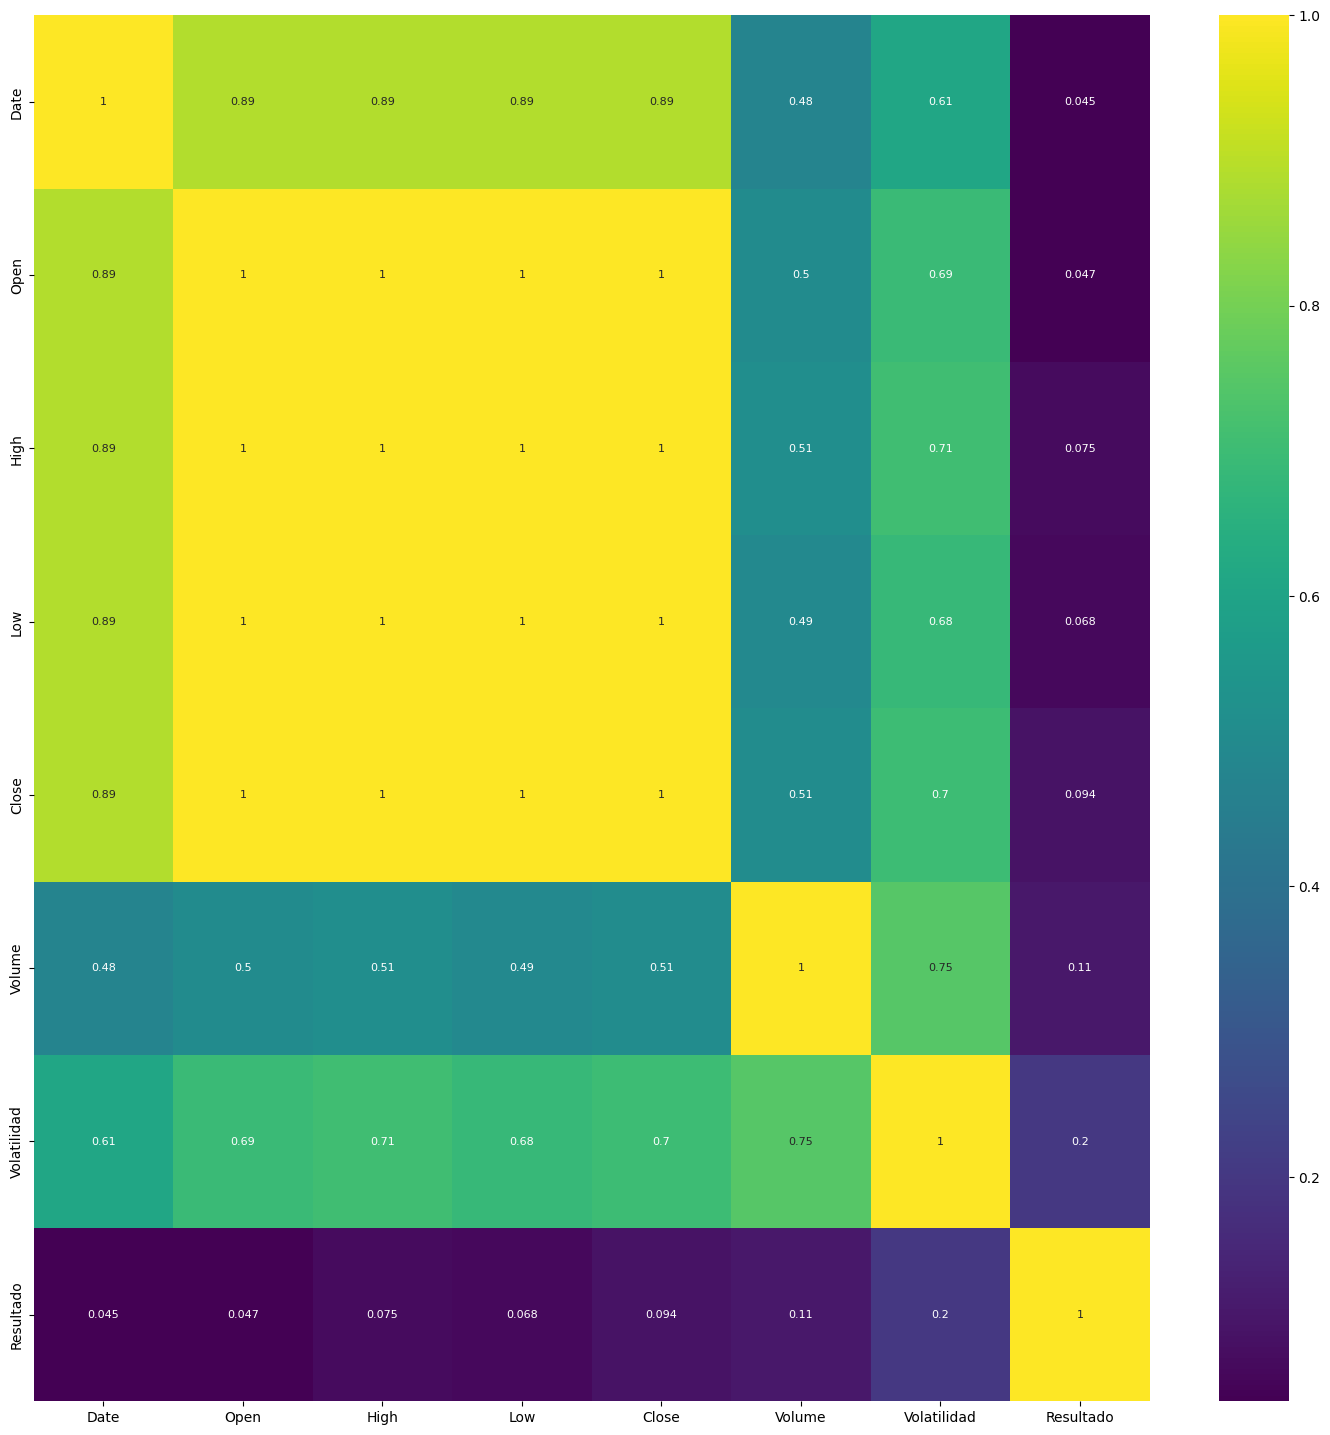

In [51]:
plt.figure(figsize=(18,18))
sns.heatmap(correlacion_pearson , annot=True, cmap="viridis",annot_kws={"size":8})
plt.show()

# Evaluacion de las correlaciones lineales
Podemos observar una correlacion directa entre las variables Open , High , Low y Close. Todos con valores en 1 por lo que la correlacion es positiva perfecta.
Para que el modelo no se vea afectado por multicolinealidad , se determina eliminar como variables predictoras a las variables que estan altamente correlacionadas. Por lo que se determina sacar a las variables 'Open', 'High' y 'Low' de las variables predictoras. Solo tomaremos  en cuenta 'Close' como variable predictora.  Tambien puede haber alguna correlacion de la variable Close con las variable Volatilidad al 0.7, aunque no tan marcada como con las variables mensionadas anteriormente. Para la evaluacion se decidio solo usar la variable 'Close' como predictora.
 


# MODELADO - EVALUACION DE MODELOS A UTILIZAR 

Como nuestro objetivo es predecir el precio de una accion que es un dato numerico continuo , debemos usar un modelo SUPERVISADO con variables predictoras.
Los modelos que se ajustan para realizar prediciones son :  Regresion Lineal, SMV (Sporte Maquinas Vectoriales) y Series Temporales.

Evaluaremos los modelos de Regresion Lineal y SMV Soporte de Maquinas Vectoriales para nuestro caso. 

##  Evaluamos Modelo de regresion lineal sobre la variable 'Close' para un pronostico de 1 dia

In [52]:

 
    forecast_days = 1
    df = data[['Close']]
    df['Prediction'] = df[['Close']].shift(-forecast_days)  
   
   
    X = np.array(df.drop('Prediction', axis=1))
    X = X[:-forecast_days]
    y = np.array(df['Prediction'])
    y = y[:-forecast_days]


    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()

    model.fit(X_train, y_train)


    accuracy = model.score(X_test, y_test)
    print('Precision {} días = '.format(forecast_days), accuracy)
    

    y_pred= model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred, squared=False)
    print('Error cuadratico medio {} dias = '.format(forecast_days), mse)



Precision 1 días =  0.9968633228810433
Error cuadratico medio 1 dias =  6.928969985769091


/tmp/ipykernel_50324/1581405715.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Prediction'] = df[['Close']].shift(-forecast_days)
/home/ssarries/.local/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Por lo Observado , el modelo de Regresion Lineal tiene una Pecision de 0.99686332 y un Error cuadratico Medio de 6.9289699 

## Evaluamos modelo de Soporte de Maquinas Vectoriales para prediccion a futuro de 1 dia 

In [53]:
    forecast_days = 1
    df = data[['Close']]
    df['Prediction'] = df[['Close']].shift(-forecast_days)  
   
   
    X = np.array(df.drop('Prediction', axis=1))
    X = X[:-forecast_days]
    y = np.array(df['Prediction'])
    y = y[:-forecast_days]


    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = SVR(kernel='rbf', C=1e3, gamma=0.1)

    model.fit(X_train, y_train)
    accuracy = model.score(X_test, y_test)
    print('Precision {} días = '.format(forecast_days), accuracy)


    y_pred= model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred, squared=False)
    print('Error cuadratico medio {} dias = '.format(forecast_days), mse)



/tmp/ipykernel_50324/2606751220.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Prediction'] = df[['Close']].shift(-forecast_days)


Precision 1 días =  0.935103214101995
Error cuadratico medio 1 dias =  31.517035892683314


/home/ssarries/.local/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Por lo Observado , el modelo de Soporte de Maquinas Vectoriales tiene una Pecision de 0.935103 y un Error cuadratico Medio de 31.5170 para el pronostico de  1 dia.

A partir de esta primera evaluacion determinamos que el modelo de regresion lineal se ajusta mas a nuestro modelo para la prediccion a futuro de 1 dia.

Evaluaremos ambos modelos para predecir mas dias. Comenzaremos evaluando 15 dias.

In [54]:
    forecast_days = 15
    df = data[['Close']]
    df['Prediction'] = df[['Close']].shift(-forecast_days)  
   
   
    X = np.array(df.drop('Prediction', axis=1))
    X = X[:-forecast_days]
    y = np.array(df['Prediction'])
    y = y[:-forecast_days]


    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)


    accuracy = model.score(X_test, y_test)
    print('Precision {} días = '.format(forecast_days), accuracy)
    

    y_pred= model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred, squared=False)
    print('Error cuadratico medio {} dias = '.format(forecast_days), mse)


Precision 15 días =  0.9511999670270654
Error cuadratico medio 15 dias =  27.03071784235495


/tmp/ipykernel_50324/3543972852.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Prediction'] = df[['Close']].shift(-forecast_days)
/home/ssarries/.local/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Evaluando el modelo de Regresion Lineal buscando una prediccion de 15 dias a futuro. Obtenemos Precision estadistica a 15 días =  0.9511999670270654 y Error cuadratico medio a 15 dias =  27.03071784235495.

Evaluaremos el modelo de Soporte de Maquinas Vectoriales para prediccion de 15 dias

In [55]:
    forecast_days = 15
    df = data[['Close']]
    df['Prediction'] = df[['Close']].shift(-forecast_days)  
   
   
    X = np.array(df.drop('Prediction', axis=1))
    X = X[:-forecast_days]
    y = np.array(df['Prediction'])
    y = y[:-forecast_days]


    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = SVR(kernel='rbf', C=1e3, gamma=0.1)

    model.fit(X_train, y_train)
    accuracy = model.score(X_test, y_test)
    print('Precision {} días = '.format(forecast_days), accuracy)


    y_pred= model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred, squared=False)
    print('Error cuadratico medio {} dias = '.format(forecast_days), mse)



/tmp/ipykernel_50324/1005381229.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Prediction'] = df[['Close']].shift(-forecast_days)


Precision 15 días =  0.9293197162868652
Error cuadratico medio 15 dias =  32.53094381232966


/home/ssarries/.local/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Evaluando el modelo de Soporte de Maquinas Vectoriales buscando una prediccion de 15 dias a futuro. Obtenemos Precision 15 días =  0.9293197162868652 y Error cuadratico medio 15 dias =  32.53094381232966.

Con ambas pruebas realizadas podemos concluir que el modelo que mas se ajusta a nuestro caso es el de Regresion Lineal.



## CONCLUSION : Luego de haber evaluado ambos modelos para predicciones de 1 dia y predicciones de 15 dias. Determinamos que el modelo Regresion Lineal se ajusta mas a nuestro caso.


# DESARROLLO DE APLICACION :
Se desarrollara una aplicacion que prediga el precio de cierre de la accion 'Close'. 
Se le solicitara  al usuario que ingrese la cantidad de dias de operacion bursatil a futuro que desea saber.  
La aplicacion devolvera la prediccion del valor de cierre 'Close', con su presicion estadistica y su error medio cuadratico.
El modelo de prediccion a utilizar sera la Regresion Lineal.
Observaciones a tener en cuenta:  
    - Esta aplicacion trabaja sobre una data set estatico provisto para el practico. Por lo que la prediccion sera a partir del ultimo dia del data set provisto.
    - Para que esto sea dinamico y el modelo siga aprendiendo , deberia importarse de Yahoo Finance el data set actualizado y realizar las predicciones sobre este data set. Las modificaciones para esto son menores pero no se incluyen en esta aplicacion.

In [65]:
# APLICACION DE PREDICCION TSLA

# Solicitar dias a futuro para el proceso
forecast_days = 0 
while forecast_days <= 0:
    try:
        forecast_days = int(input("Ingrese cantidad de dias a futuro de prediccion: "))
        if forecast_days  <= 0:
            print("Por favor, ingrese un número mayor que 0.")
    except ValueError:
        print("Entrada inválida. Por favor, ingrese un número de dias válido.")

# preparo el data set para modelar
df = data[['Close']]
df['Prediction'] = df[['Close']].shift(-forecast_days)  
   
   
X = np.array(df.drop('Prediction', axis=1))
X = X[:-forecast_days]
y = np.array(df['Prediction'])
y = y[:-forecast_days]

# Dividimos en datos de entrenamiento y de prueba 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Seleccionamos el modelo de Regresion Lineal 
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluamos la precision estadistica
accuracy = model.score(X_test, y_test)
    
y_pred= model.predict(X_test)

# Evaluamos el error medio cuadratico 
mse = mean_squared_error(y_test, y_pred, squared=False)



df1 = data[['Close']]
prediccion = model.predict(df1)
data['Next_Prediccion'] = prediccion    # Agrego predicciones
    
ultimo_registro = data.iloc[-1]    # Guardo el ultimo registro
    
pronostico =  ultimo_registro['Next_Prediccion']

# Imprimo resultados
print('Valor de Cierre estimado para  {} días = '.format(forecast_days), pronostico)
print('Precision estadistica del modelo a  {} días = '.format(forecast_days), accuracy)
print('Error cuadratico medio del modelo a  {} dias = '.format(forecast_days), mse)


Valor de Cierre estimado para  2 días =  781.4700366498279
Precision estadistica del modelo a  2 días =  0.9933553356073604
Error cuadratico medio del modelo a  2 dias =  10.183523432681799


/tmp/ipykernel_50324/2004048949.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Prediction'] = df[['Close']].shift(-forecast_days)
/home/ssarries/.local/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/ssarries/.local/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
